In [38]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import copy

torch.manual_seed(0)


Each project follows the same overall structure:

- Download the data and preprocess it as required for the given task (if needed).
- Write a Dataset class for creating the train and test datasets (and corresponding dataloaders).
- Define the neural network model.
- Define the hyperparameters to create an instance of the model (e.g., hidden space size, number of convolution kernels...) as well as the parameters required to train neural network (e.g., learning rate).
- Write the training loop for training the model.
- Evaluate the model on the test data. In this part, it is expected to choose an appropriate evaluation metric based on your task. For instance, for classification task, accuracy should be computed (but you can also search for 'precision' and 'recall').
Save the trained model parameters, and the obtained results if needed.
- Ideally, visualize the results, e.g., display an image/audio/text, along with the true and estimated label. As bonus you can also compute the t-sne embeddings over layers, plot a confusion matrix between classes to see where errors come from, etc.

In [25]:
# Each numpy file has 2062

X = np.load('./Sign-language-digits-dataset/X.npy')
y = np.load('./Sign-language-digits-dataset/Y.npy')

In [26]:
print(X[0])

[[0.46666667 0.4745098  0.47843137 ... 0.5176471  0.5137255  0.5019608 ]
 [0.49803922 0.4862745  0.4862745  ... 0.5254902  0.5176471  0.50980395]
 [0.54509807 0.49411765 0.49019608 ... 0.5294118  0.5254902  0.5137255 ]
 ...
 [0.5019608  0.5137255  0.5176471  ... 0.5529412  0.54509807 0.53333336]
 [0.49803922 0.5058824  0.5137255  ... 0.54509807 0.53333336 0.52156866]
 [0.49019608 0.49803922 0.5019608  ... 0.5294118  0.52156866 0.50980395]]


In [27]:
print(X[0].shape)

(64, 64)


In [28]:
# takes a set of numpy and returns an image

def myplot(x):
    plt.figure()
    plt.imshow(x, cmap='gray')
    plt.show()
    return

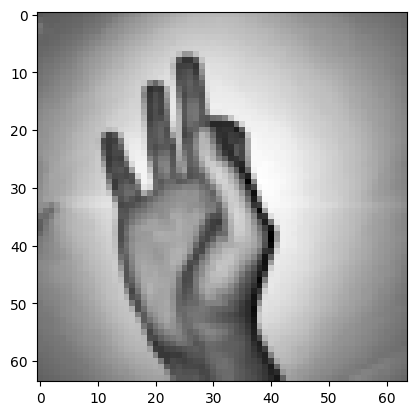

In [29]:
myplot(X[0])

## Split into Train, Validation and Test

In [30]:
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_, y_, test_size=0.5, random_state=42)

In [32]:
print('Len train: ', len(X_train))
print('Len valid: ', len(X_valid))
print('Len test: ', len(X_test))

Len train:  1649
Len valid:  207
Len test:  206


In [35]:
class DigitDataset(Dataset):
  def __init__(self, images, labels):
        self.labels = labels
        self.images = images

  def __len__(self):
        return len(self.images)

  def __getitem__(self, index):
        X = self.images[index]
        y = self.labels[index]

        return X, y

In [36]:
BATCH_SIZE = 8

train_set = DigitDataset(X_train, y_train)
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)

valid_set = DigitDataset(X_valid, y_valid)
valid_loader = DataLoader(valid_set)

In [37]:
next(iter(train_set))

(array([[0.56078434, 0.5647059 , 0.5647059 , ..., 0.5411765 , 0.54901963,
         0.54509807],
        [0.56078434, 0.57254905, 0.5764706 , ..., 0.56078434, 0.56078434,
         0.5529412 ],
        [0.5647059 , 0.5764706 , 0.5803922 , ..., 0.57254905, 0.5686275 ,
         0.5568628 ],
        ...,
        [0.5137255 , 0.5176471 , 0.5176471 , ..., 0.49411765, 0.49411765,
         0.4862745 ],
        [0.50980395, 0.50980395, 0.50980395, ..., 0.49411765, 0.49019608,
         0.47843137],
        [0.5019608 , 0.5019608 , 0.5058824 , ..., 0.4862745 , 0.48235294,
         0.47058824]], dtype=float32),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]))